In [2]:
#Imports
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Generate data
n = 400
dim = 3
x = np.random.uniform(-1, 1, (n, dim))
print('Input shape =', x.shape)

Input shape = (400, 3)


In [4]:
# Initialize weights and bias
weights = np.array([[3, -3, 1]]).T
bias = np.array([8])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = np.einsum('ij, jk -> ik', (x**3),  weights) + np.einsum('ij, jk -> ik', (x**2),  weights) + np.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (400, 1)


In [5]:
#initialize hyperparameters
input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 50

In [6]:
#Linear layer class
# Linear layer class

class Linear:
  def __init__(self, input_dim, output_dim):
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0/input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    self.x = x
    return np.einsum('ij, jk -> ik', x, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = np.einsum('ij, jk -> ik', self.x.T, gradient) #self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = np.einsum('ij, jk -> ik', gradient, self.weights.T) #gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - (lr * self.weights_gradient)
    self.bias = self.bias - (lr * self.bias_gradient)

In [7]:
#error function
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((self.y_pred - self.y_true) ** 2).mean()

  def backward(self):
    self.n = self.y_true.shape[0]
     # gradient of loss function wrt y_pred
    self.gradient = (2.0 * (self.y_pred - self.y_true)) /  n
    return self.gradient

In [8]:
# Non-Linearity using ReLu
class ReLu:
  def __call__(self, input):
    self.input = input
    self.output = np.clip(self.input, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input > 0) * output_gradient
    return self.input_gradient

In [9]:
# Non-linear model

class Model:
  def __init__(self, input_dim, output_dim , hidden_dim):
    self.linear1 = Linear(input_dim, hidden_dim)
    self.relu1 = ReLu()
    self.linear2 = Linear(hidden_dim, hidden_dim)
    self.relu2 = ReLu()
    self.linear3 = Linear(hidden_dim, output_dim)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    l3_gradient = self.linear3.backward(output_gradient)
    r2_gradient = self.relu2.backward(l3_gradient)
    l2_gradient = self.linear2.backward(r2_gradient)
    r1_gradient = self.relu1.backward(l2_gradient)
    l1_gradient = self.linear1.backward(r1_gradient)
    return l1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [10]:
# Traning non-linear model
loss_ = []

def fit(x, y_true, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_gradient = loss.backward()
    model.backward(loss_gradient)
    model.update(lr)
    loss_.append(loss_value)
  return loss_

In [11]:
loss = MSE()
model = Model(input_dim, output_dim, hidden_dim)
loss_ = fit(x, y_true, model, loss, learning_rate, num_epochs)

Epoch 0, loss 99.919257836303
Epoch 1, loss 78.94257210649891
Epoch 2, loss 64.92281690779653
Epoch 3, loss 51.1075195966084
Epoch 4, loss 36.579632729785224
Epoch 5, loss 23.271351065699154
Epoch 6, loss 14.741649211464612
Epoch 7, loss 11.245269414672237
Epoch 8, loss 9.613820833049237
Epoch 9, loss 8.464344286266025
Epoch 10, loss 7.554851961822148
Epoch 11, loss 6.814478603521486
Epoch 12, loss 6.211141112369514
Epoch 13, loss 5.715827427941989
Epoch 14, loss 5.297829249610512
Epoch 15, loss 4.948626528323378
Epoch 16, loss 4.65291466195321
Epoch 17, loss 4.399478955568352
Epoch 18, loss 4.178434991870338
Epoch 19, loss 3.9874134089175834
Epoch 20, loss 3.8226555213100677
Epoch 21, loss 3.677480953212248
Epoch 22, loss 3.550000265275685
Epoch 23, loss 3.4374366334589737
Epoch 24, loss 3.33621513464891
Epoch 25, loss 3.245161534150034
Epoch 26, loss 3.161842196862921
Epoch 27, loss 3.085310673570963
Epoch 28, loss 3.0147055331613593
Epoch 29, loss 2.948125533568688
Epoch 30, loss 2.

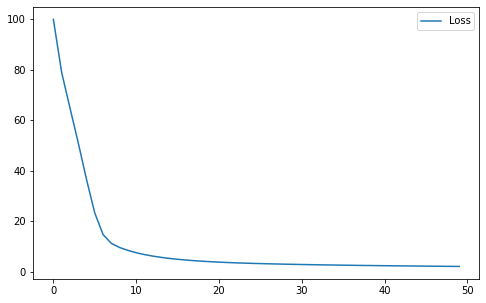

In [12]:
# Plot epoch vs loss
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

In [13]:
loss = MSE()
model = Model(input_dim, output_dim, hidden_dim)

# Train model - one forward and one backward pass for visualization
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(learning_rate)
y_pred = model(x)

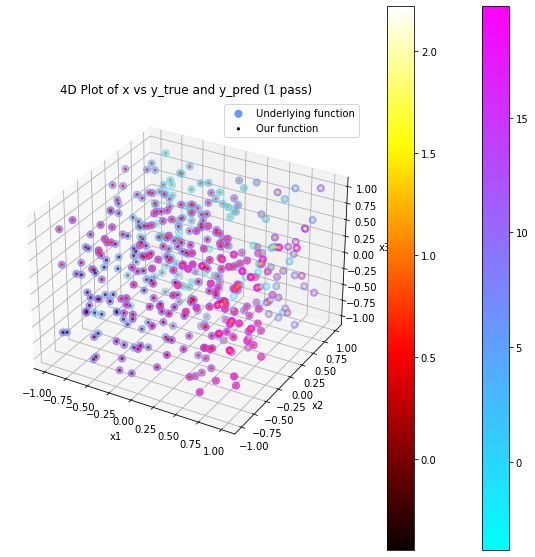

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()